<a href="https://colab.research.google.com/github/guadalupevoss/TP-1-Redes/blob/main/tp_red.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Librerías, drive y datos** 📚

---

In [20]:
import numpy as np
from matplotlib import pyplot as plt
import keras.backend as ka

from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

import keras
from keras import optimizers
from keras import metrics

from tensorflow.keras.layers import Dense, Flatten, ReLU, BatchNormalization
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from keras import initializers

ka.clear_session()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Y = pd.read_csv('/content/drive/MyDrive/Redes Neuronales/train_labels.csv')
X = np.load('/content/drive/MyDrive/Redes Neuronales/train_images.npy')
test_X  = np.load('/content/drive/MyDrive/Redes Neuronales/test_images.npy')

cantidad_datos_X = len(test_X)
X_len = len(X)
Y_len = len(Y)
print("Cantidad de datos en test_X:", cantidad_datos_X)
print("Cantidad de datos en X:", X_len)
print("Cantidad de datos en Y:", Y_len)

Cantidad de datos en test_X: 10000
Cantidad de datos en X: 60000
Cantidad de datos en Y: 60000


#  **1-EDA:** 
---




* **1-EDA:** *Visualizar algunas instancias de cada clase. Hacer histogramas de la distribución de intensidades para cada clase, cualquier otra propuesta es bienvenida.*

*test_size = 0.1: Especifica el tamaño del conjunto de datos de validación como una fracción del conjunto de datos total. En este caso, el valor de 0.1 indica que el 10% de los datos se utilizarán para la validación, mientras que el 90% restante se utilizará para el entrenamiento.*
:

In [14]:
train_X, val_X, train_Y, val_Y = train_test_split(X,Y,test_size= 0.1)   # Divido los tatos totales train y validación
train_X_norm = train_X/255        # Normalizo los datos de train
val_X_norm = val_X/255            # Normalizo datos de validación

👆 *Se realiza la normalización de los datos dividiendo las imágenes por 255. La razón detrás de esta operación es que el conjunto de datos Fashion MNIST, al igual que muchos otros conjuntos de datos de imágenes, utiliza una representación de píxeles en escala de grises en la que los valores van desde 0 (negro) hasta 255 (blanco).*

In [15]:
y_train_categorical = keras.utils.to_categorical(train_Y)
y_val_categorical = keras.utils.to_categorical(val_Y)

*Las etiquetas de las clases se suelen representar originalmente como valores enteros, donde cada valor entero representa una clase diferente. Por ejemplo, en el conjunto de datos Fashion MNIST, las etiquetas son números enteros del 0 al 9, cada uno representando una clase específica de prenda de vestir.
El formato one-hot encoding es una representación binaria de las etiquetas que es más adecuada para el entrenamiento de redes neuronales. Consiste en transformar cada etiqueta en un vector binario de longitud igual al número total de clases, donde todos los elementos del vector son ceros, excepto el elemento correspondiente a la clase de la etiqueta, que es uno. Por ejemplo, si tenemos 10 clases, el vector one-hot para la clase 3 sería [0, 0, 1, 0, 0, 0, 0, 0, 0, 0].
La función to_categorical de Keras se encarga de realizar esta conversión de forma automática. Toma como entrada un array de etiquetas enteras y devuelve un array con las etiquetas transformadas en formato one-hot encoding. En tu caso, train_Y y val_Y son los arrays de etiquetas originales, y y_train_categorical y y_val_categorical son los arrays resultantes con las etiquetas en formato one-hot encoding.
La representación one-hot encoding es útil en problemas de clasificación, ya que permite que la red neuronal aprenda a asignar correctamente las probabilidades a cada clase y facilita la interpretación de las salidas de la red.
Al utilizar to_categorical, se convierten las etiquetas enteras en formato one-hot encoding para facilitar el entrenamiento de la red neuronal y la interpretación de las salidas.*


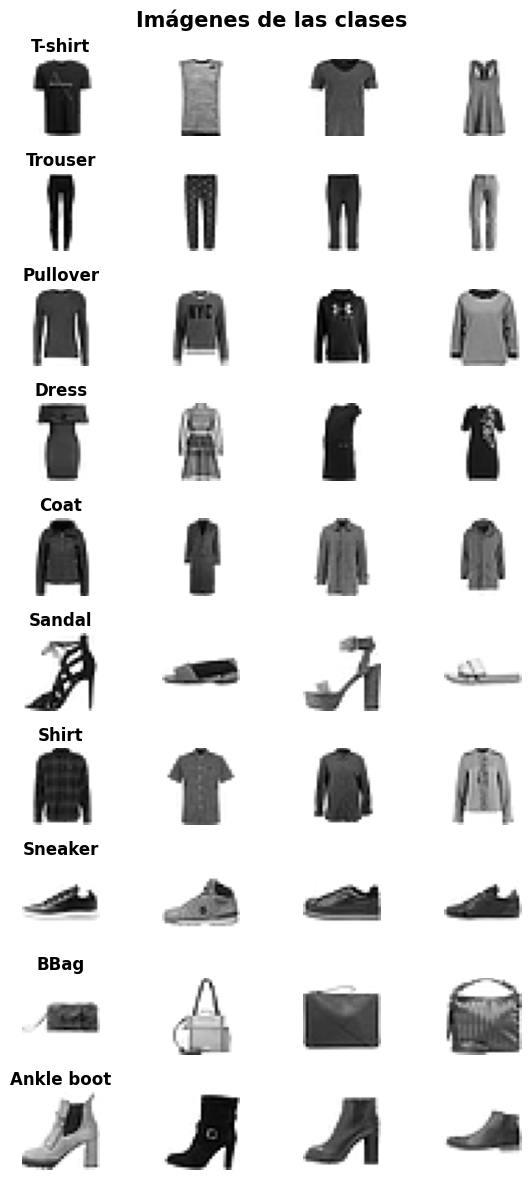

In [16]:
# Imágenes de las 10 clases

clases=['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','BBag','Ankle boot']
cantidad_fotos= 4
tamaño = 6
figura1,axs = plt.subplots(len(clases), cantidad_fotos, figsize=(tamaño, 2*tamaño))
for i in range(len(clases)):
  indice = np.where(Y == i)[0]
  np.random.shuffle(indice)
  for j in range(cantidad_fotos):
    axs[i,j].imshow(X[indice[j]], cmap='binary')
    axs[i,j].axis('off')
    if j==0:
      axs[i,j].set_title(clases[i], fontweight='heavy')
figura1.suptitle("Imágenes de las clases", fontsize=15, fontweight='heavy')  # Título de la figura
plt.tight_layout()
plt.show()


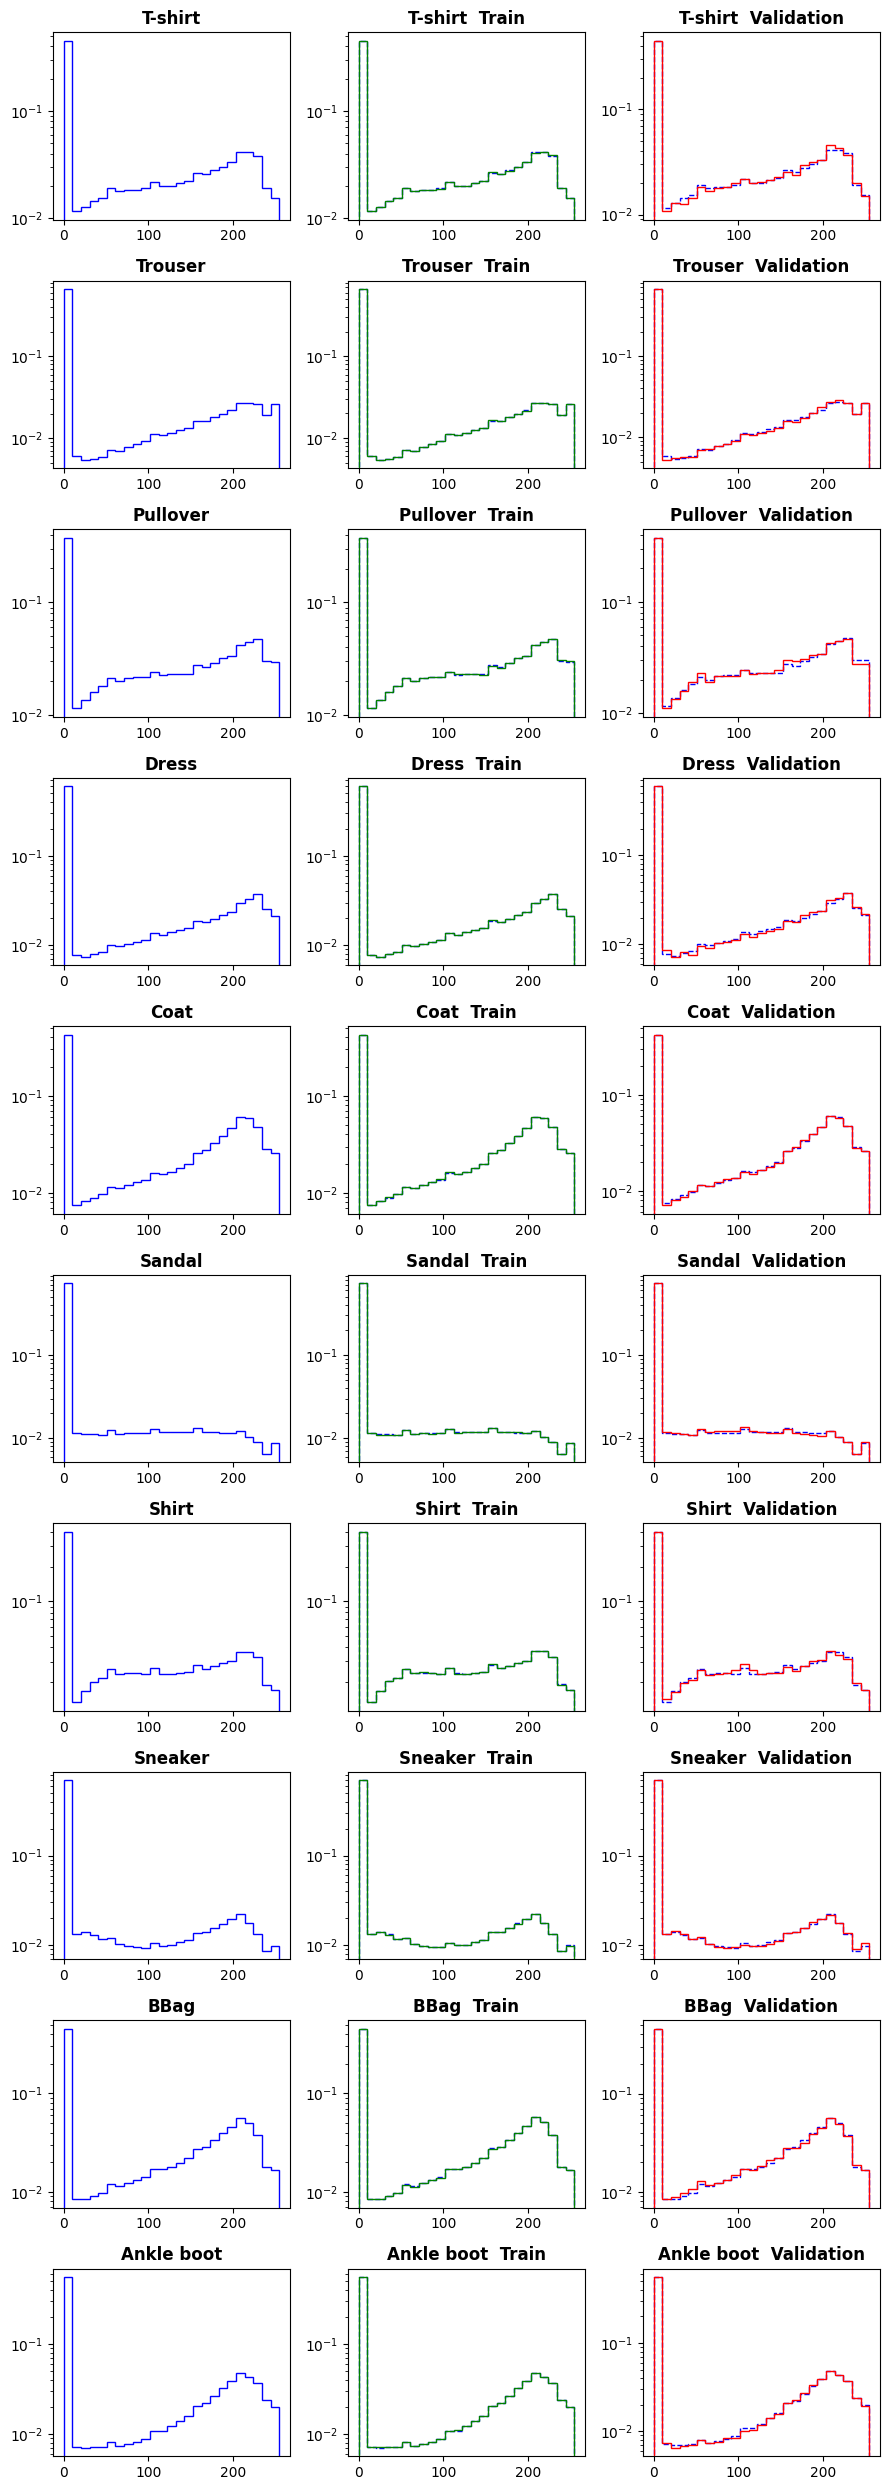

In [17]:
clases = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'BBag', 'Ankle boot']

figura, axs = plt.subplots(10, 3, figsize=(9, 25))

for clase_idx, clase in enumerate(clases):
    # Histograma para total de imágenes
    Y_array = Y.to_numpy()  # Convertir DataFrame a arreglo de Numpy
    counts_total, bins_total = np.histogram(X[Y_array.flatten() == clase_idx].flatten(), bins=25)
    axs[clase_idx, 0].stairs(counts_total / X[Y_array.flatten() == clase_idx].flatten().size, bins_total, color='blue')
    axs[clase_idx, 1].stairs(counts_total / X[Y_array.flatten() == clase_idx].flatten().size, bins_total, color='blue',linestyle='dashed')
    axs[clase_idx, 2].stairs(counts_total / X[Y_array.flatten() == clase_idx].flatten().size, bins_total, color='blue',linestyle='dashed')
    axs[clase_idx, 0].set_title(clase, fontweight='heavy')
    axs[clase_idx, 0].set_yscale("log")

    # Histograma para train
    train_Y_array = train_Y.to_numpy()  # Convertir DataFrame a arreglo de Numpy
    counts_train, bins_train = np.histogram(train_X[train_Y_array.flatten() == clase_idx].flatten(), bins=25)
    axs[clase_idx, 1].stairs(counts_train / train_X[train_Y_array.flatten() == clase_idx].flatten().size, bins_train, color='green')
    axs[clase_idx, 1].set_title(clase + '  Train', fontweight='heavy')
    axs[clase_idx, 1].set_yscale("log")

    # Histograma para validation
    val_Y_array = val_Y.to_numpy()  # Convertir DataFrame a arreglo de Numpy
    counts_val, bins_val = np.histogram(val_X[val_Y_array.flatten() == clase_idx].flatten(), bins=25)
    axs[clase_idx, 2].stairs(counts_val / val_X[val_Y_array.flatten() == clase_idx].flatten().size, bins_val, color='red')
    axs[clase_idx, 2].set_title(clase + '  Validation', fontweight='heavy')
    axs[clase_idx, 2].set_yscale("log")
    
figura.tight_layout()
plt.show()


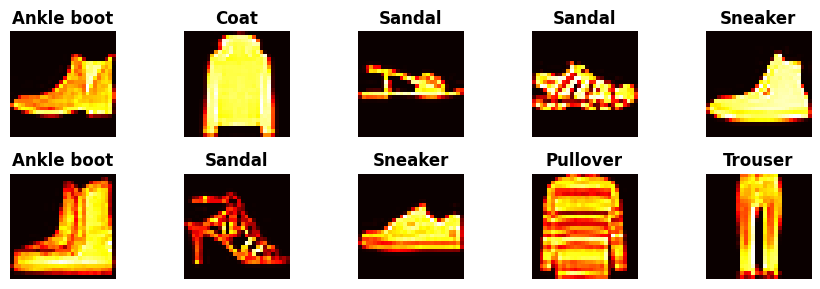

In [ ]:
#    Data Augmentation

# random_state para asegurarme de que la división de datos sea siempre la misma.
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=42)

# Preprocesamiento de datos (Normalizado) 
X_train_norm = X_train / 255.0
X_val_norm = X_val / 255.0

train_images = np.expand_dims(X_train_norm, axis=-1)

datagen = ImageDataGenerator(
    horizontal_flip=True,
    zoom_range=0.01
)

datagen.fit(train_images)

augmented_images = datagen.flow(train_images, Y_train, batch_size=256)



# Obtener un lote de imágenes generadas
class_name =['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','BBag','Ankle boot']

augmented_batch = next(augmented_images)
# Extraer las primeras 10 imágenes del lote
images = augmented_batch[0][:10]
labels = augmented_batch[1][:10]  # Etiquetas correspondientes a las imágenes
# Visualizar las imágenes junto con las etiquetas
fig, axs = plt.subplots(2, 5, figsize=(9, 3))
for i, ax in enumerate(axs.flatten()):
    ax.imshow(images[i], cmap='binary')
    ax.axis('off')
    class_index = labels[i][0]  # Obtener el índice del valor máximo en la etiqueta
    ax.set_title(str((clases[class_index])),fontweight='heavy')
plt.tight_layout()
plt.show()


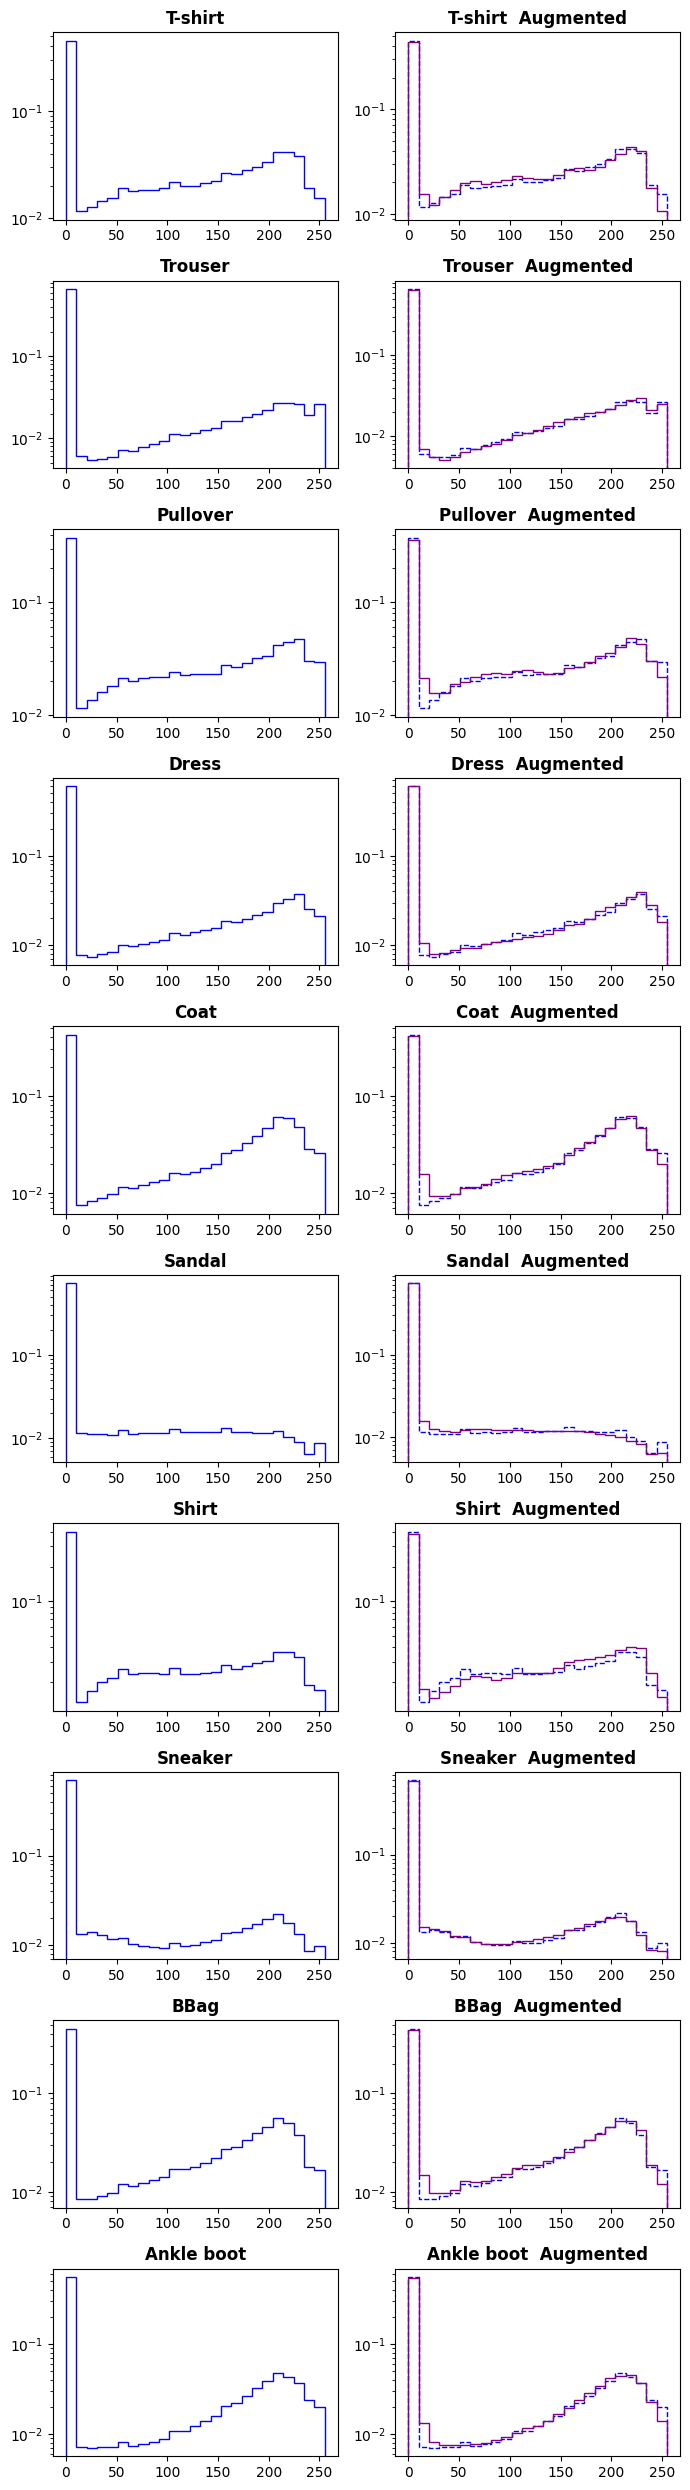

In [19]:
# Histograma para total y augmented

X_hist = np.expand_dims(X, axis=-1)

datagen = ImageDataGenerator(
    horizontal_flip=True,
    zoom_range=0.01
)
datagen.fit(X_hist)
augmented_images_h1 = datagen.flow(X_hist, Y, batch_size= 5000)
augmented_batch_1 = next(augmented_images_h1)



clases = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'BBag', 'Ankle boot']

figura, axs = plt.subplots(10, 2, figsize=(7, 25))

for clase_idx, clase in enumerate(clases):
    # Histograma para total de imágenes
    Y_array = Y.to_numpy()  # Convertir DataFrame a arreglo de Numpy
    counts_total, bins_total = np.histogram(X[Y_array.flatten() == clase_idx].flatten(), bins=25)
    axs[clase_idx, 0].stairs(counts_total / X[Y_array.flatten() == clase_idx].flatten().size, bins_total, color='blue')
    axs[clase_idx, 1].stairs(counts_total / X[Y_array.flatten() == clase_idx].flatten().size, bins_total, color='blue',linestyle='dashed')
    axs[clase_idx, 0].set_title(clase, fontweight='heavy')
    axs[clase_idx, 0].set_yscale("log")

    # Histograma para augmentation 1
    counts_train, bins_train = np.histogram(augmented_batch_1[0][augmented_batch_1[1].flatten() == clase_idx].flatten(), bins=25)
    axs[clase_idx, 1].stairs(counts_train / augmented_batch_1[0][augmented_batch_1[1].flatten() == clase_idx].flatten().size, bins_train, color='purple')
    axs[clase_idx, 1].set_title(clase + '  Augmented', fontweight='heavy')
    axs[clase_idx, 1].set_yscale("log")


figura.tight_layout()
plt.show()


# **2 - Modelos**

---



* **2 - Modelos:** *Entrenar un modelo de clasificación en las 10 clases de Fashion MNIST. Regresión softmax y MLP. En el caso que corresponda probar y comparar: distintas
funciones de activación, distintos optimizadores, distintas funciones de costo, distintos
tamaños de red (cantidad de capas y tamaño de cada capa), learning rate, batch_size,
dropout rates, batch_normalization (si/no), inicializaciones de pesos (glorot_uniform,
glorot_normal, normal(0,1), normal(0,0.001)).*



*Métricas a reportar para cada entrenamiento de interés: Accuracy como métrica principal. Como métricas secundarias: curva ROC, área bajo la curva ROC, F1-score, Precisión y Recall. Enunciar para el F1-score y el área bajo la curva ROC cómo se calculan los promedios macro y micro. Justificar cuál de los dos es el que corresponde reportar en este problema.
Para un buen modelo obtenido en el punto anterior (así si lo mejoran no tienen que repetir este punto), variar los hiperparámetros de a uno y graficar:*


1.   *Accuracy vs [LEARNING_RATE, BATCH_SIZE, OPTIMIZADORES, ACTIVACIONES,
DROPOUT_RATE, BATCH_NORMALIZATION, INICIALIZACIONES DE PESOS]*
2.   *Iteraciones de entrenamiento vs [LEARNING_RATE, BATCH_SIZE, OPTIMIZADORES,
ACTIVACIONES, DROPOUT_RATE, BATCH_NORMALIZATION, INICIALIZACIONES DE
PESOS]*


*Intente justificar los gráficos obtenidos. Valores mínimos esperados para cada modelo: SoftmaxReg: .70, MLP: .83*


#  *2.1: Modelo Softmax* 

Se variaron los distintos parámetros en el modelo softmax para encontrar cuál es el mejor. Los resultados fueron los siguientes:


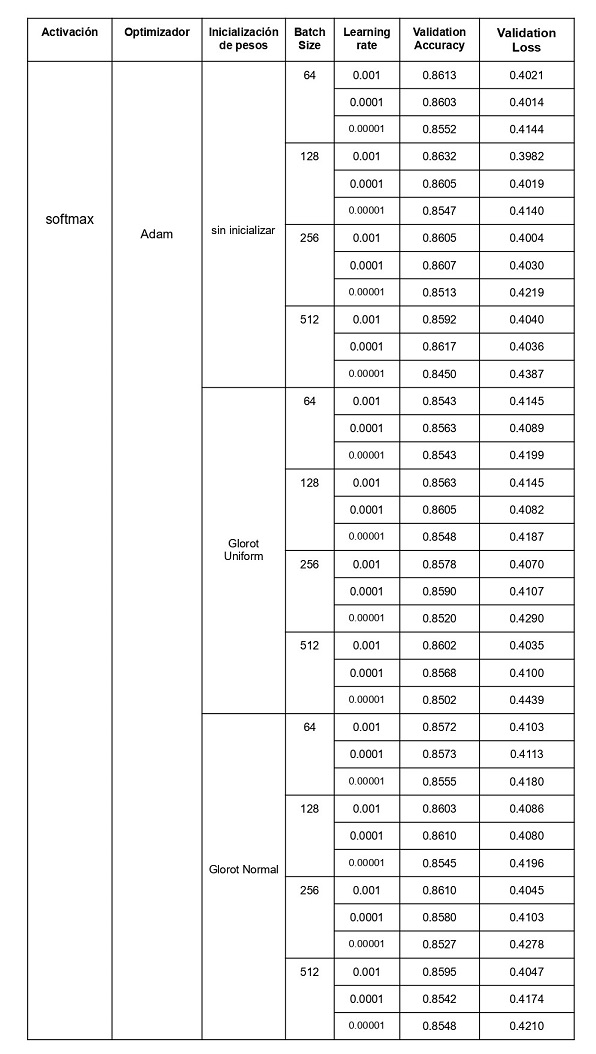

In [ ]:
ka.clear_session()
# random_state para asegurarme de que la división de datos sea siempre la misma.
X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size=0.1, random_state=42)
# Preprocesamiento de datos (Normalizado) 
X_train_norm = X_train / 255.0
X_val_norm = X_val / 255.0


model_Softmax =  Sequential()
model_Softmax.add(Flatten(input_shape=(28,28)))
model_Softmax.add(Dense(10, activation="softmax", kernel_initializer=initializers.glorot_normal()))

model_Softmax.compile(loss = "categorical_crossentropy", optimizer=optimizers.Adam(learning_rate=0.00001),metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=5)

model_Softmax.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#history = model_Softmax.fit(x= train_X_norm, y = y_train_categorical, validation_data=(val_X_norm, y_val_categorical), batch_size =512, epochs=700, callbacks = [early_stopping])
#history = model_Softmax.fit(augmented_images, validation_data=(val_X_norm, val_Y), epochs=10)

#  *2.1: Modelo MLP* 

Para el modelo MLP se probaron distintos valores de batch_size, learning_rate, cantidad de capas ocultas y cantidad de neuronas de estas capas ocultas.
En todos los casos se utilizó una capa de salida softmax de 10 neuronas y entrada flatten de 28*28 y batch normalization. El optimizador que se utilizó fue 'Adam'.




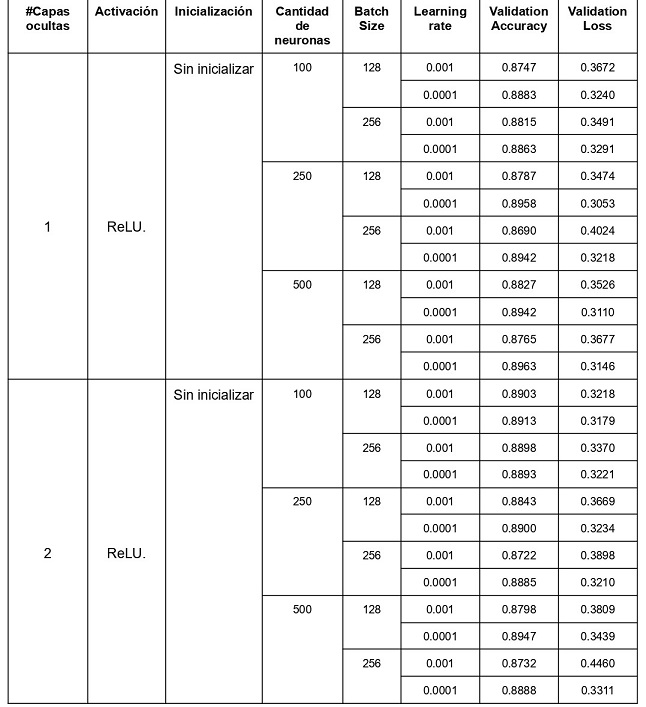

# Pruebas sobre el modelo MLP


In [ ]:
ka.clear_session()
model =  Sequential()

# Capa 1 con función de activación ReLU
model.add(Flatten(input_shape=(28,28)))  # Agrega la capa Flatten aquí
model.add(Dense(units=500,activation='ReLU', kernel_initializer=initializers.RandomNormal(mean=0, stddev=0.001)))
model.add(BatchNormalization())

# Capa 2 con función de activación Sigmoid
model.add(Dense(units=500, activation='ReLU', kernel_initializer=initializers.RandomNormal(mean=0, stddev=0.001)))
model.add(BatchNormalization())

# Capa 5 con función de activación softmax con 10 clases a la salida
model.add(Dense(units=10, activation="softmax",kernel_initializer=initializers.RandomNormal(mean=0, stddev=0.001)))

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.Adam(learning_rate=0.00001),
              metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=10)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 500)               392500    
                                                                 
 batch_normalization (BatchN  (None, 500)              2000      
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 500)               250500    
                                                                 
 batch_normalization_1 (Batc  (None, 500)              2000      
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 10)                5

In [ ]:
#history = model.fit(x= augmented_images.reshape((54000, 28, 28)), y = y_train_categorical, validation_data=(val_X_norm, y_val_categorical), batch_size = 128, epochs=35, callbacks = [early_stopping])
#history1= model.fit(x= train_X_norm, y = y_train_categorical, validation_data=(val_X_norm, y_val_categorical), batch_size = 16, epochs=50)


In [ ]:
# Para correr el modelo    
# Modelo definitivo
def train(x_train, y_train, val_data, learning_rate=0.0001, batch_size= 128, epochs=50, verbose=0):
  ka.clear_session()
  early_stopping = EarlyStopping(monitor='val_loss', patience=5)
  model=Sequential()
  # Capa 1 de entrada 
  model.add(Flatten(input_shape=(28,28)))
  # Capa 3 con función de activación ReLU
  model.add(Dense(units=500,activation='ReLU', kernel_initializer=initializers.RandomNormal(mean=0, stddev=0.001)))
  model.add(BatchNormalization())
  # Capa 3 con función de activación ReLU
  model.add(Dense(units=500, activation='ReLU', kernel_initializer=initializers.RandomNormal(mean=0, stddev=0.001)))
  model.add(BatchNormalization())
  # Capa 4 con función de activación softmax con 10 clases a la salida
  model.add(Dense(units=10, activation="softmax",kernel_initializer=initializers.RandomNormal(mean=0, stddev=0.001)))


  model.compile(loss='categorical_crossentropy', optimizer=optimizers.Adam(learning_rate=learning_rate), metrics=['accuracy'])
  #early_stopping = EarlyStopping(monitor='val_loss', patience=10)

  history = model.fit(x=x_train,
            y=y_train,
            batch_size = batch_size,
            epochs = epochs,
            verbose = verbose,
            validation_data= val_data,
            #callbacks = [early_stopping]
            )
  return history


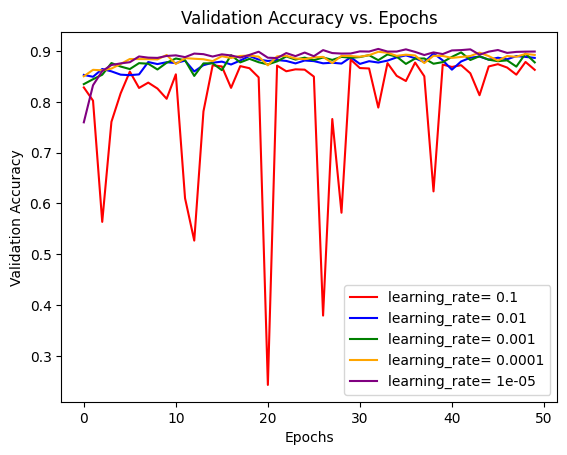

In [21]:
# Accuracy Para distintos valores de learning rate. 

# Paleta de colores
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'gray', 'brown']
learning_rate_arr = [0.1, 0.01, 0.001, 0.0001, 0.00001]

for i, learning_rate in enumerate(learning_rate_arr):
  history_val_acc = train(train_X_norm, y_train_categorical, (val_X_norm, y_val_categorical), learning_rate= learning_rate)
  val_acc = history_val_acc.history["val_accuracy"]
  plt.plot(val_acc, label='learning_rate= ' + str(learning_rate_arr[i]), color= colors[i])

# Personalizar la apariencia del gráfico
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Epochs')
plt.legend()

# Mostrar el gráfico
plt.show()

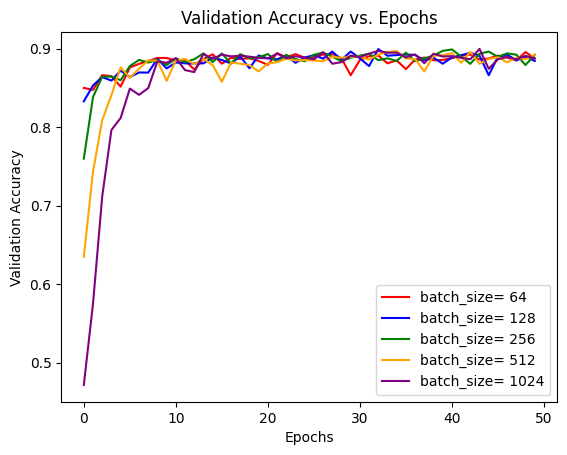

In [ ]:
# Accuracy Para distintos valores de batch size. 

# Paleta de colores
colors = ['red', 'blue', 'green', 'orange', 'purple', 'pink', 'gray', 'brown']
batch_size_arr = [64, 128, 256, 512, 1024]

for i, batch_size in enumerate(batch_size_arr):
  history_val_acc = train(train_X_norm, y_train_categorical, (val_X_norm, y_val_categorical), learning_rate=0.0001, batch_size= batch_size)
  val_acc = history_val_acc.history["val_accuracy"]
  plt.plot(val_acc, label='batch_size= ' + str(batch_size_arr[i]), color= colors[i])

# Personalizar la apariencia del gráfico
plt.xlabel('Epochs')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy vs. Epochs')
plt.legend()

# Mostrar el gráfico
plt.show()